In [1]:
!nvidia-smi

Mon Jul 10 08:35:06 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   67C    P8    12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
from google.colab import drive
drive.mount('/content/drive')
import shutil

Mounted at /content/drive


In [3]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8

⚠️ YOLOv8 is still under heavy development. Breaking changes are being introduced almost weekly. We strive to make our YOLOv8 notebooks work with the latest version of the library. Last tests took place on **27.01.2023** with version **YOLOv8.0.20**.

If you notice that our notebook behaves incorrectly - especially if you experience errors that prevent you from going through the tutorial - don't hesitate! Let us know and open an [issue](https://github.com/roboflow/notebooks/issues) on the Roboflow Notebooks repository.

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [4]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 24.2/78.2 GB disk)


In [5]:
from ultralytics import YOLO

from IPython.display import display, Image

## CLI Basics

If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://docs.ultralytics.com/usage/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

## Inference with Pre-trained COCO Model

### 💻 CLI

`yolo mode=predict` runs YOLOv8 inference on a variety of sources, downloading models automatically from the latest YOLOv8 release, and saving results to `runs/predict`.

In [6]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet
from roboflow import Roboflow
rf = Roboflow(api_key="2qfrIwZkt6G31Ap3K7Fh")
project = rf.workspace("uit-5rhkt").project("biensoxe-7geys")
dataset = project.version(10).download("yolov8")




/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.6/55.6 kB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.5 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to BIENSOXE-10 in yolov8:: 100%|██████████| 4966/4966 [00:01<00:00, 2775.38it/s]


## Custom Training

In [ ]:
%cd {HOME}
!yolo task=detect mode=train model=yolov8m.pt imgsz=640 data={dataset.location}/data.yaml epochs=100 batch=16

# !yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=800 plots=True

/content
100% 49.7M/49.7M [00:00<00:00, 354MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8m.yaml, data=/content/datasets/BIENSOXE-10/data.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=False, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=Fal

In [51]:
!yolo  mode=val model=/content/drive/MyDrive/data/train1/weights/best.pt data=/content/datasets/BIENSOXE-10/data.yaml iou=0.5

2023-07-10 09:23:50.346914: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-10 09:23:51.181100: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25842655 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/datasets/BIENSOXE-10/valid/labels.cache... 484 images, 3 backgrounds, 0 corrupt: 100% 484/484 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 127, len(boxes) = 793. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segme

In [52]:
%cd {HOME}
!yolo mode=val model=/content/drive/MyDrive/data/train1/weights/best.pt data=/content/datasets/BIENSOXE-10/data.yaml  iou=0.5

/content
2023-07-10 09:24:44.939336: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-10 09:24:45.780138: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25842655 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/datasets/BIENSOXE-10/test/labels.cache... 251 images, 0 backgrounds, 0 corrupt: 100% 251/251 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 71, len(boxes) = 399. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detec

In [53]:
%cd {HOME}
!yolo  mode=val model=/content/drive/MyDrive/data/train1/weights/best.pt data=/content/datasets/BIENSOXE-10/data.yaml iou=0.75

/content
2023-07-10 09:25:00.085485: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-10 09:25:00.913142: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25842655 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/datasets/BIENSOXE-10/test/labels.cache... 251 images, 0 backgrounds, 0 corrupt: 100% 251/251 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 71, len(boxes) = 399. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detec

In [54]:
%cd {HOME}
!yolo task=detect mode=val model=/content/drive/MyDrive/data/train1/weights/best.pt data=/content/datasets/BIENSOXE-10/data.yaml iou=0.9

/content
2023-07-10 09:25:15.102467: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-10 09:25:15.942701: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25842655 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/datasets/BIENSOXE-10/test/labels.cache... 251 images, 0 backgrounds, 0 corrupt: 100% 251/251 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 71, len(boxes) = 399. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detec

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
2023-07-08 13:02:06.664996: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-08 13:02:07.546067: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25842655 parameters, 0 gradients, 78.7 GFLOPs
image 1/251 /content/datasets/BIENSOXE-10/test/images/0000_02187_b_jpg.rf.7c6de465e71d9665e4e3217c244e55bb.jpg: 640x640 1 Bien_trang, 41.1ms
image 2/251 /content/datasets/BIENSOXE-10/test/images/0003_07398_b_jpg.rf.bc365d4de20245204074574a8353ccdc.jpg: 640x640 1 Bien_trang, 37.1ms
image 3/251 /content/datasets/BIENSOXE-10/test/images/0020_02063_b_jpg.rf.a116a2fd5400fdf4aa80c83f76a2f25

In [ ]:
!pip install -U -q PyDrive

In [ ]:
import shutil
shutil.copytree("/content/runs/detect/train", "/content/drive/MyDrive/data/train1")

'/content/drive/MyDrive/data/train1'

In [ ]:
shutil.copytree("/content/runs/detect/predict", "/content/drive/MyDrive/data/predict1")

'/content/drive/MyDrive/data/predict1'

In [ ]:
import pandas as pd

In [ ]:
pd.read_csv('/content/runs/detect/train/results.csv')

,epoch,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),...,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,0,1.28500,3.07020,1.10090,0.55531,...,1.02320,1.00340,0.070275,0.003303,0.003303
1,1,1.18720,1.18440,0.99453,0.63223,...,0.99044,1.02270,0.040210,0.006570,0.006570
2,2,1.24910,1.24510,1.01490,0.53101,...,1.87950,1.05640,0.010078,0.009772,0.009772
3,3,1.29380,1.26130,1.03560,0.60057,...,1.40880,1.09000,0.009703,0.009703,0.009703
4,4,1.32750,1.18310,1.05330,0.44040,...,1.56090,1.08010,0.009703,0.009703,0.009703
...,...,...,...,...,...,...,...,...,...,...,...
95,95,0.81037,0.44947,0.91509,0.81805,...,0.68052,0.95386,0.000694,0.000694,0.000694
96,96,0.78844,0.44219,0.90202,0.82583,...,0.70027,0.95461,0.000595,0.000595,0.000595
97,97,0.78988,0.45683,0.90739,0.82342,...,0.69374,0.95079,0.000496,0.000496,0.000496
98,98,0.77084,0.43913,0.90261,0.82619,...,0.68160,0.95027,0.000397,0.000397,0.000397


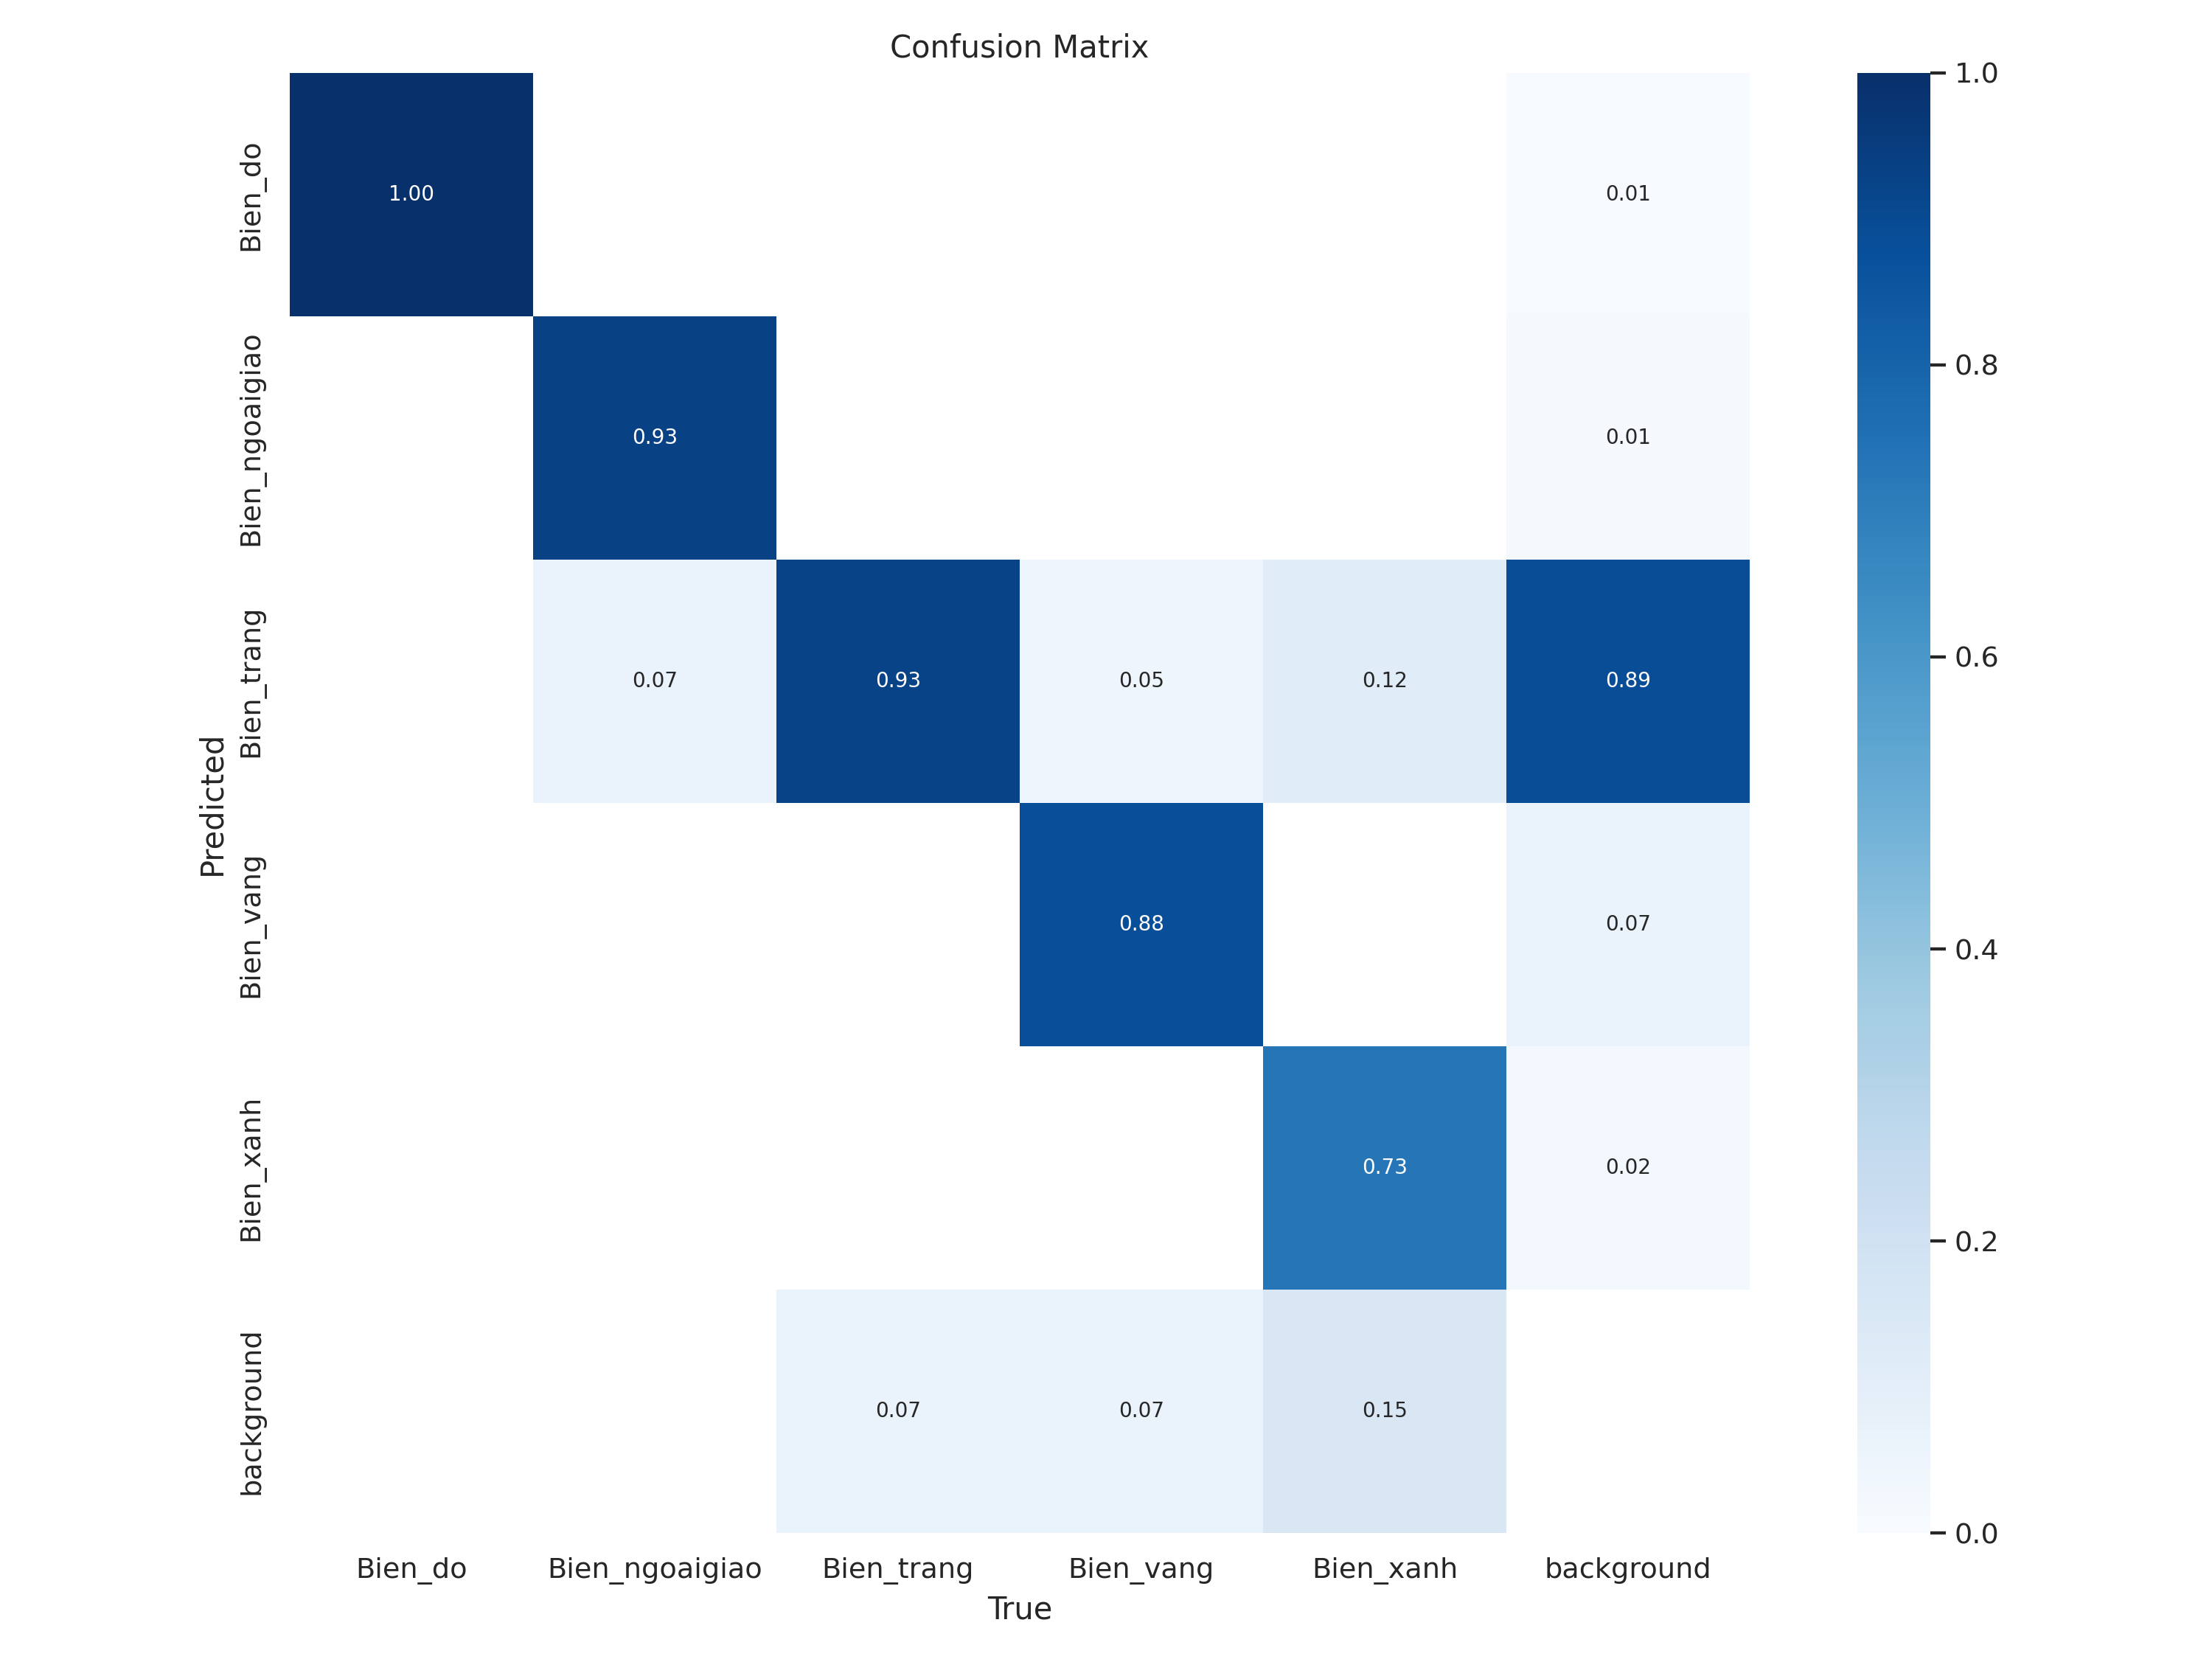

In [ ]:
Image('/content/runs/detect/train/confusion_matrix.png', width=800)

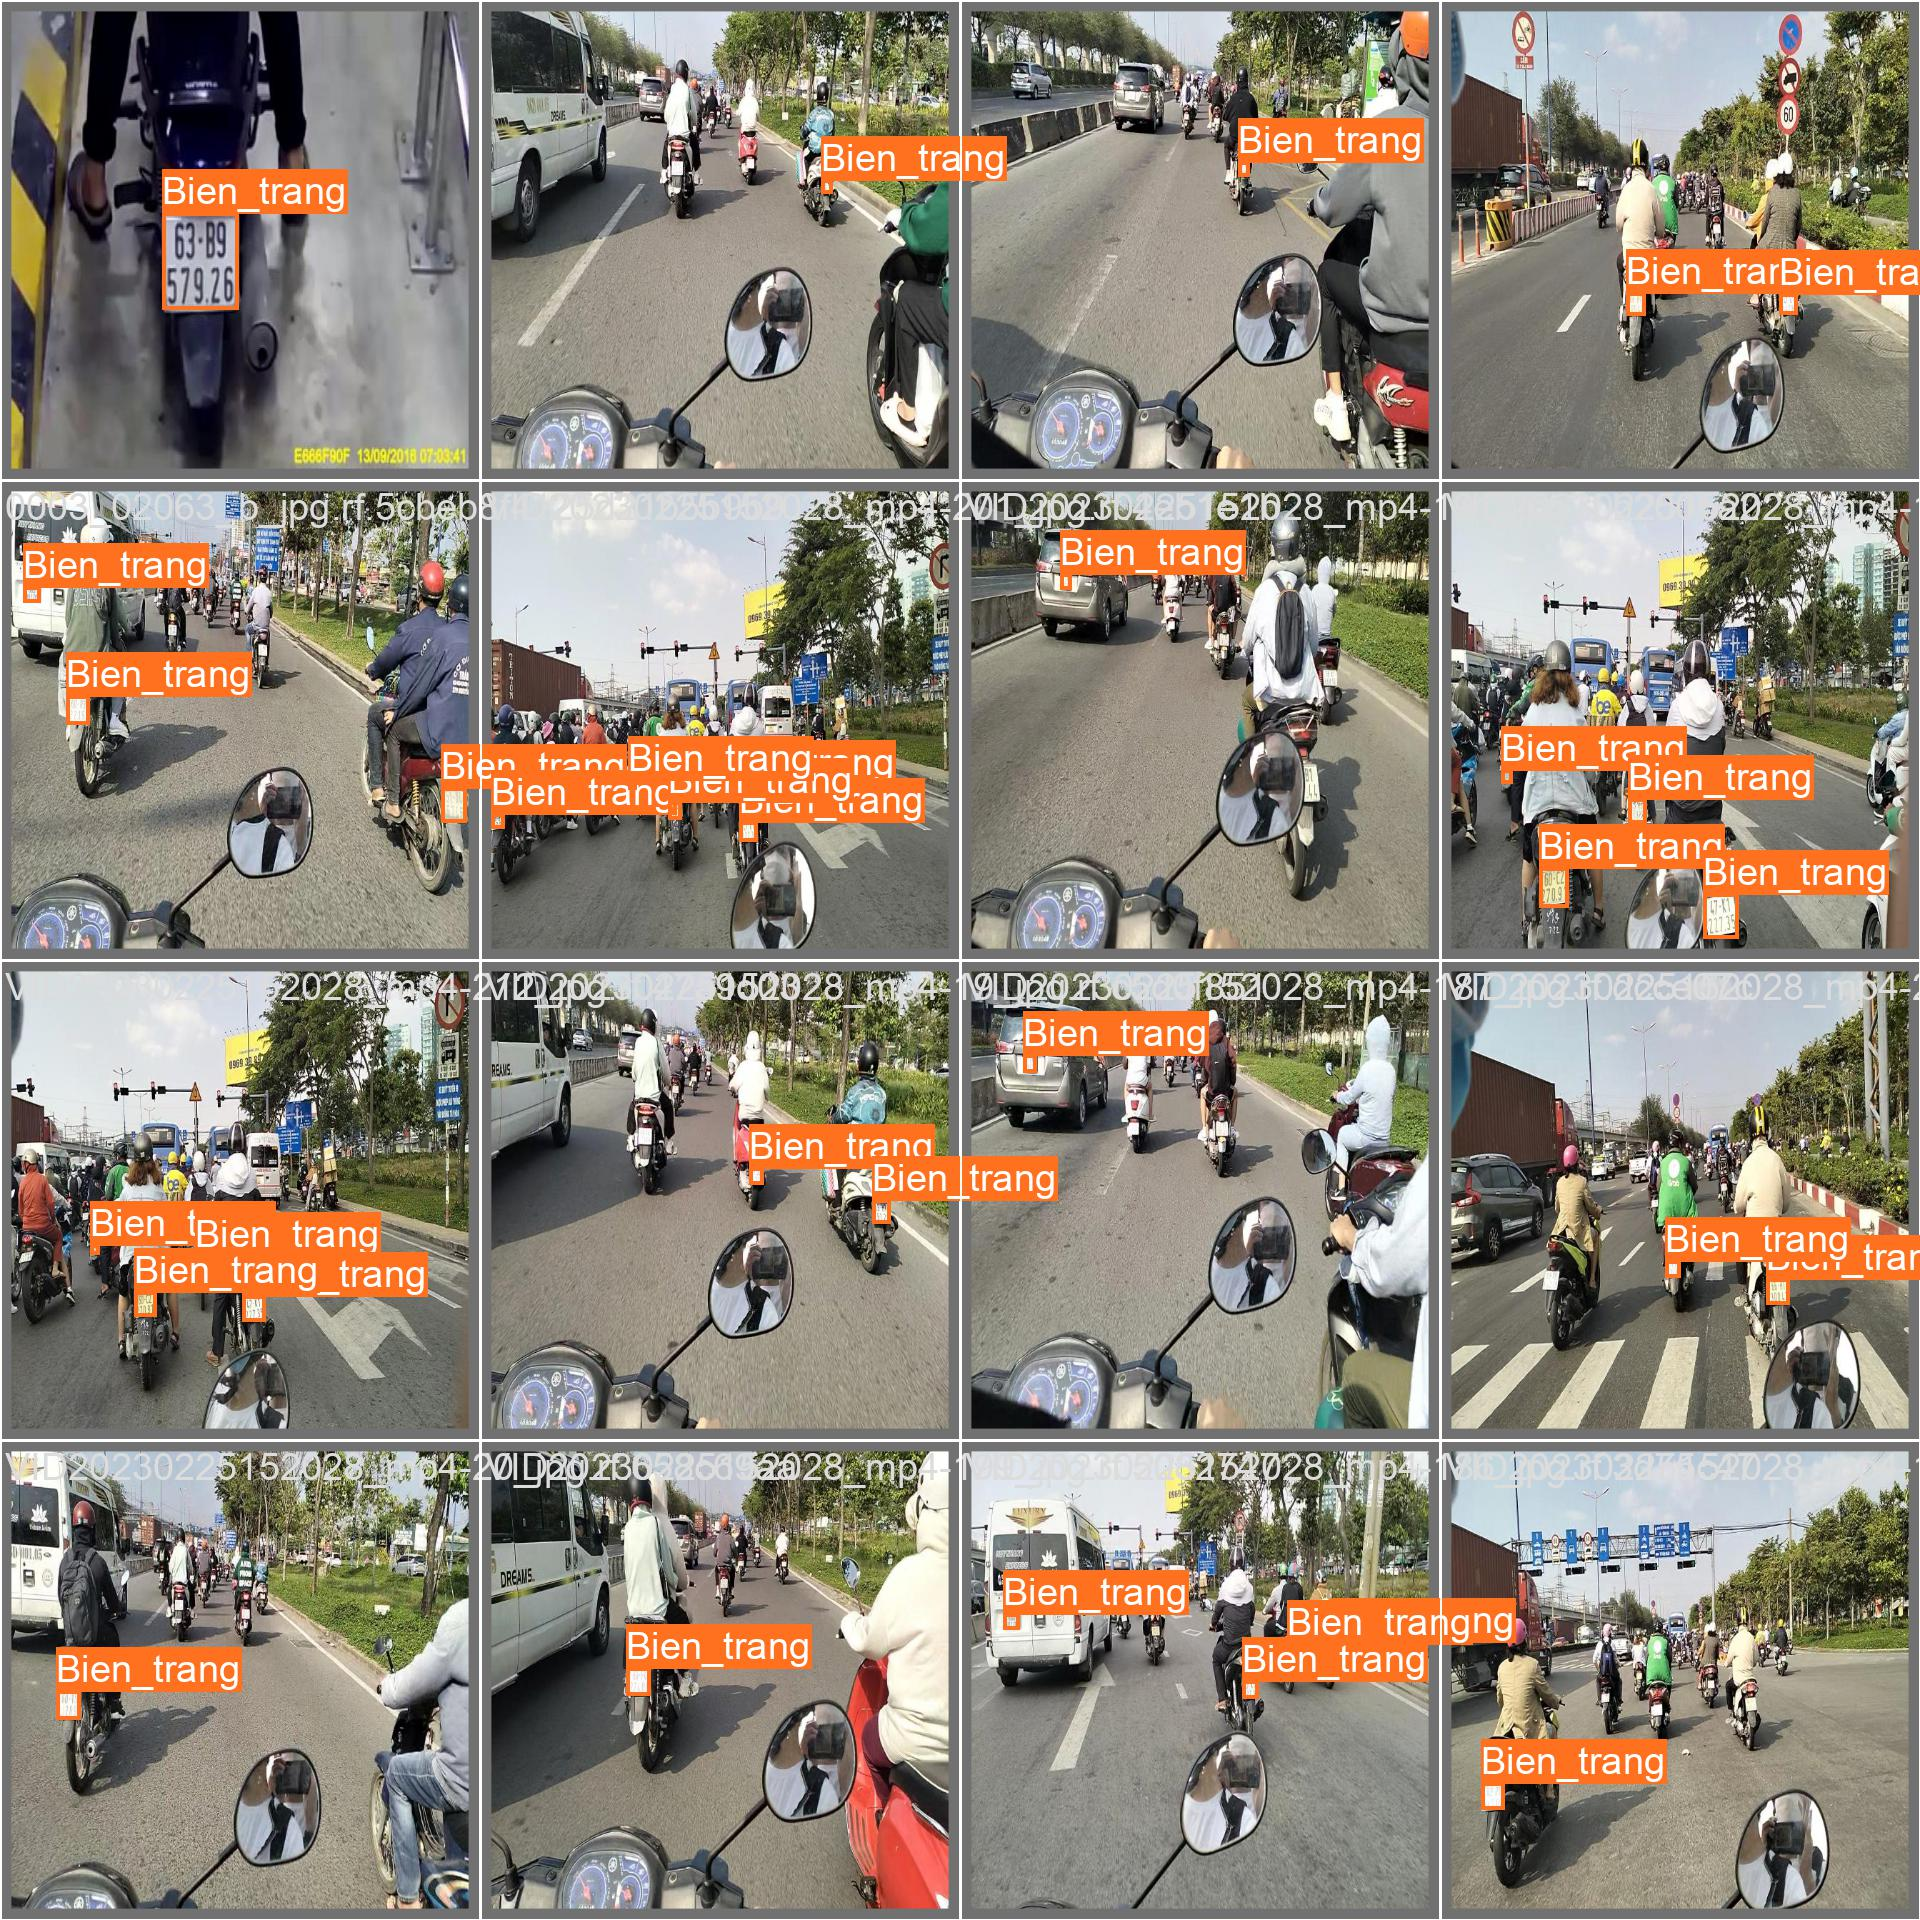

In [ ]:
Image('/content/runs/detect/train/val_batch0_labels.jpg', height=800, width=1200)

In [ ]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source=/content/datasets/BIENSOXE-10/test/images/VID20230225153822_mp4-3_jpg.rf.3380d16afd290e280ea02777ae170bc7.jpg save=True

2023-07-08 13:54:21.522968: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-08 13:54:22.342886: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25842655 parameters, 0 gradients, 78.7 GFLOPs
image 1/1 /content/datasets/BIENSOXE-10/test/images/VID20230225153822_mp4-3_jpg.rf.3380d16afd290e280ea02777ae170bc7.jpg: 640x640 4 Bien_trangs, 1 Bien_vang, 36.9ms
Speed: 0.7ms pre-process, 36.9ms inference, 87.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2


In [ ]:
from ultralytics import YOLO
import cv2
image_path='/content/datasets/BIENSOXE-10/test/images/VID20230225153822_mp4-3_jpg.rf.3380d16afd290e280ea02777ae170bc7.jpg'
img_source = cv2.imread(image_path)
model = YOLO('/content/drive/MyDrive/data/train1/weights/best.pt')
img = cv2.cvtColor(img_source, cv2.COLOR_BGR2RGB)
results = model.predict(source=img)

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25842655 parameters, 0 gradients, 78.7 GFLOPs


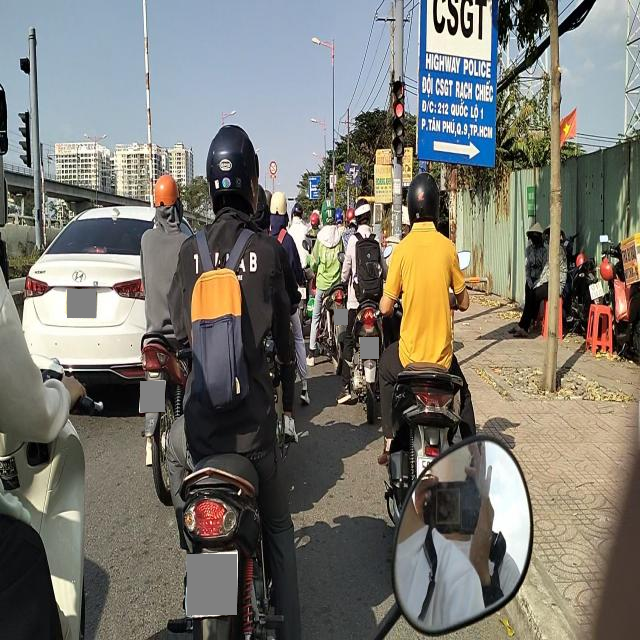

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
import re
import os

# Read the original image
image = cv2.imread(image_path)

# output_dir = "/content/cropped_images"  # Thư mục đầu ra cho các ảnh đã cắt
# os.makedirs(output_dir, exist_ok=True)  # Tạo thư mục đầu ra nếu chưa tồn tại

for i, result in enumerate(results):
    for j, box in enumerate(result.boxes):
        # Chuỗi ký tự chứa tọa độ
        coordinates_str = str(box.xyxy)

        # Loại bỏ các ký tự không phải là số hoặc dấu chấm từ chuỗi
        coordinates_str = coordinates_str.replace("tensor([[", "").replace("]], device='cuda:0')", "")

        # Tách chuỗi thành các giá trị tọa độ
        coordinates_list = coordinates_str.split(", ")

        # Chuyển đổi các giá trị tọa độ thành số thực và loại bỏ .0
        coordinates = [int(float(coord)) for coord in coordinates_list]

        # Assign coordinates to xmin, ymin, xmax, ymax
        xmin, ymin, xmax, ymax = coordinates

        # Draw the rectangle on the image
        cv2.rectangle(image, (xmin, ymin), (xmax, ymax), (128, 128, 128), -1)
cv2_imshow(image)

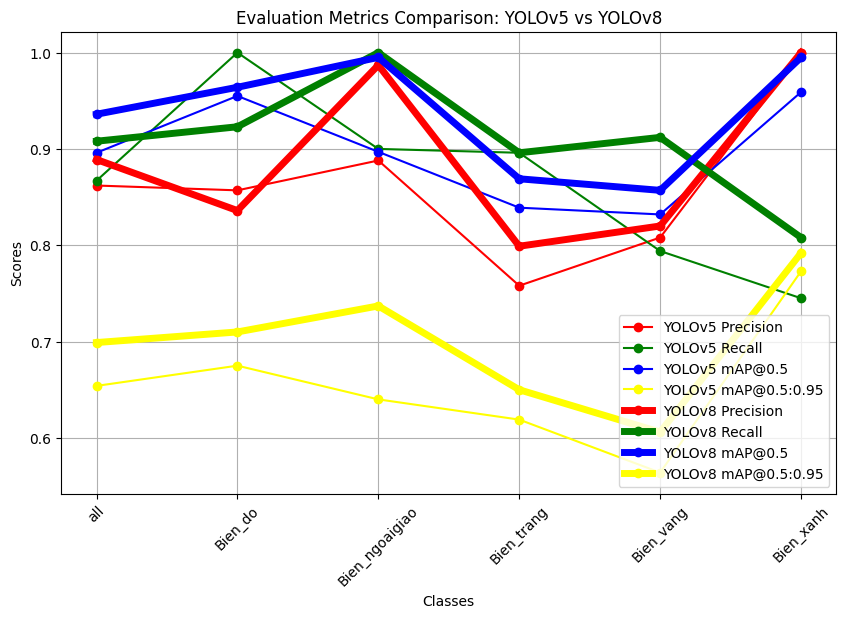

In [61]:
import matplotlib.pyplot as plt

# Dữ liệu đánh giá của YOLOv5
yolov5_p = [0.862, 0.857, 0.888, 0.758, 0.808, 1.0]
yolov5_r = [0.867, 1.0, 0.9, 0.896, 0.794, 0.745]
yolov5_map50 = [0.896, 0.955, 0.897, 0.839, 0.832, 0.959]
yolov5_map5095 = [0.654, 0.675,  0.64, 0.619, 0.564, 0.773]

# Dữ liệu đánh giá của YOLOv8
yolov8_p = [0.889, 0.836, 0.987, 0.799, 0.82, 1.0]
yolov8_r = [0.908, 0.923, 1.0, 0.896, 0.912, 0.808]
yolov8_map50 = [0.936, 0.964, 0.995, 0.869, 0.857, 0.995]
yolov8_map5095 = [0.699, 0.71, 0.737, 0.65, 0.606, 0.792]

# Tên các lớp
classes = ['all', 'Bien_do', 'Bien_ngoaigiao', 'Bien_trang', 'Bien_vang', 'Bien_xanh']

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))

plt.plot(classes, yolov5_p, marker='o', color='red',label='YOLOv5 Precision')
plt.plot(classes, yolov5_r, marker='o',color='green', label='YOLOv5 Recall')
plt.plot(classes, yolov5_map50, marker='o', color='blue',label='YOLOv5 mAP@0.5')
plt.plot(classes, yolov5_map5095, marker='o',color='yellow', label='YOLOv5 mAP@0.5:0.95')

plt.plot(classes, yolov8_p, marker='o', linewidth=5,color='red', label='YOLOv8 Precision')
plt.plot(classes, yolov8_r, marker='o', linewidth=5, color='green',label='YOLOv8 Recall')
plt.plot(classes, yolov8_map50, marker='o', linewidth=5,color='blue', label='YOLOv8 mAP@0.5')
plt.plot(classes, yolov8_map5095, marker='o', linewidth=5,color='yellow', label='YOLOv8 mAP@0.5:0.95')


plt.xlabel('Classes')
plt.ylabel('Scores')
plt.title('Evaluation Metrics Comparison: YOLOv5 vs YOLOv8')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)

plt.show()